In [1]:
import numpy as np
import pandas as pd

# Nombre d'enregistrements (clients)
n_clients = 2000

# Générer des données fictives réalistes pour les colonnes
np.random.seed(42)  # Pour rendre les résultats reproductibles

# Âge des clients (18 à 70 ans)
ages = np.random.randint(18, 70, size=n_clients)

# Revenu annuel des clients (10k à 150k euros)
annual_income = np.random.randint(10000, 150000, size=n_clients)

# Score de dépenses (1 à 100, basé sur des comportements d'achats)
spending_score = np.random.randint(1, 100, size=n_clients)

# Nombre d'achats en ligne par an (0 à 50)
online_purchases = np.random.randint(0, 50, size=n_clients)

# Si le client possède une carte de fidélité ou non
loyalty_card = np.random.choice([True, False], size=n_clients)

# Catégorie de revenu (Low, Medium, High, Very High)
income_category = pd.cut(annual_income, bins=[0, 30000, 70000, 120000, 150000], labels=['Low', 'Medium', 'High', 'Very High'])

# Dépense mensuelle moyenne (calculée de manière aléatoire mais corrélée au revenu)
monthly_expenses = (annual_income / 12) * np.random.uniform(0.2, 0.7, size=n_clients)

# Création du DataFrame avec les données fictives
data = pd.DataFrame({
    'Client_ID': np.arange(1, n_clients + 1),
    'Age': ages,
    'Annual_Income': annual_income,
    'Spending_Score': spending_score,
    'Online_Purchases': online_purchases,
    'Loyalty_Card': loyalty_card,
    'Income_Category': income_category,
    'Monthly_Expenses': monthly_expenses
})

# Sauvegarder les données dans un fichier CSV
data.to_csv('company_data.csv', index=False)

print("Base de données générée et sauvegardée sous 'company_data.csv'.")


Base de données générée et sauvegardée sous 'company_data.csv'.


C:\Users\KBH9801\AppData\Local\Temp\ipykernel_3824\3401186884.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print(data.head())

   Client_ID  Age  Annual_Income  Spending_Score  Online_Purchases  \
0          1   56          92879              54                36   
1          2   69         146727              88                25   
2          3   46          54859              68                34   
3          4   32          62098              92                33   
4          5   60         132413              79                34   

   Loyalty_Card Income_Category  Monthly_Expenses  
0         False            High       5396.905567  
1         False       Very High       6597.651082  
2         False          Medium       1083.636472  
3         False          Medium       3603.837071  
4          True       Very High       4457.320816  


In [3]:
print("There is some information about data")
print(data.info())
print("There is a describe about data")
print(data.describe())

There is some information about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Client_ID         2000 non-null   int32   
 1   Age               2000 non-null   int32   
 2   Annual_Income     2000 non-null   int32   
 3   Spending_Score    2000 non-null   int32   
 4   Online_Purchases  2000 non-null   int32   
 5   Loyalty_Card      2000 non-null   bool    
 6   Income_Category   2000 non-null   category
 7   Monthly_Expenses  2000 non-null   float64 
dtypes: bool(1), category(1), float64(1), int32(5)
memory usage: 58.9 KB
None
There is a describe about data
         Client_ID          Age  Annual_Income  Spending_Score  \
count  2000.000000  2000.000000    2000.000000     2000.000000   
mean   1000.500000    43.805500   79669.556000       50.331000   
std     577.494589    14.929203   40501.639502       28.276602   
min 

In [4]:
data_dropID=data.drop(columns="Client_ID")

In [6]:
new_columns_loyalty = []
for cor in data["Loyalty_Card"] : 
    if cor :
        new_columns_loyalty.append(1)
    else :
        new_columns_loyalty.append(0)
data_dropID["Loyalty"] = new_columns_loyalty
print(data_dropID.head)

<bound method NDFrame.head of       Age  Annual_Income  Spending_Score  Online_Purchases  Loyalty_Card  \
0      56          92879              54                36         False   
1      69         146727              88                25         False   
2      46          54859              68                34         False   
3      32          62098              92                33         False   
4      60         132413              79                34          True   
...   ...            ...             ...               ...           ...   
1995   63          17352              33                30          True   
1996   67          98835              19                13          True   
1997   69         107493              28                48          True   
1998   24          38927              52                36          True   
1999   20         111948              49                 1         False   

     Income_Category  Monthly_Expenses  Loyalty  
0      

In [7]:
data_dropLoyalty=data.drop(columns = "Loyalty_Card")
print(data_dropLoyalty.head())

   Client_ID  Age  Annual_Income  Spending_Score  Online_Purchases  \
0          1   56          92879              54                36   
1          2   69         146727              88                25   
2          3   46          54859              68                34   
3          4   32          62098              92                33   
4          5   60         132413              79                34   

  Income_Category  Monthly_Expenses  
0            High       5396.905567  
1       Very High       6597.651082  
2          Medium       1083.636472  
3          Medium       3603.837071  
4       Very High       4457.320816  


In [8]:
data_numerical = data_dropLoyalty.drop(columns = "Income_Category")
print(data_numerical.head())

   Client_ID  Age  Annual_Income  Spending_Score  Online_Purchases  \
0          1   56          92879              54                36   
1          2   69         146727              88                25   
2          3   46          54859              68                34   
3          4   32          62098              92                33   
4          5   60         132413              79                34   

   Monthly_Expenses  
0       5396.905567  
1       6597.651082  
2       1083.636472  
3       3603.837071  
4       4457.320816  


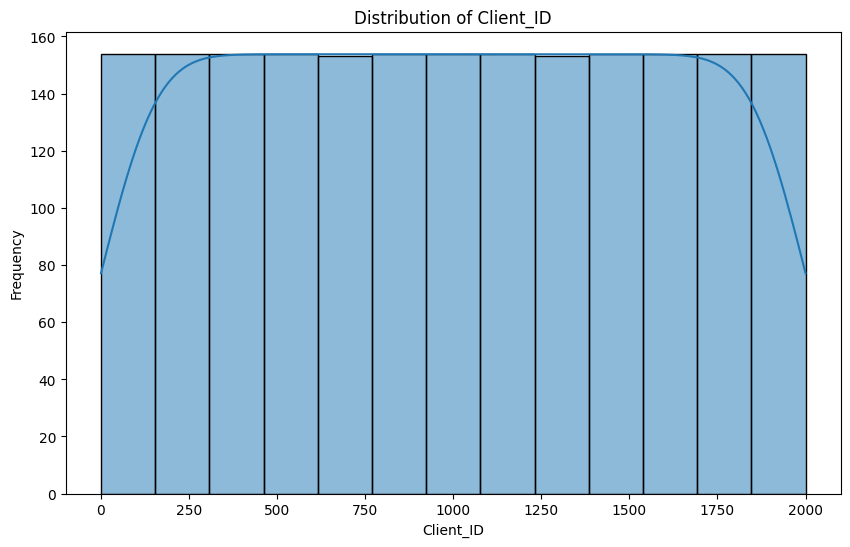

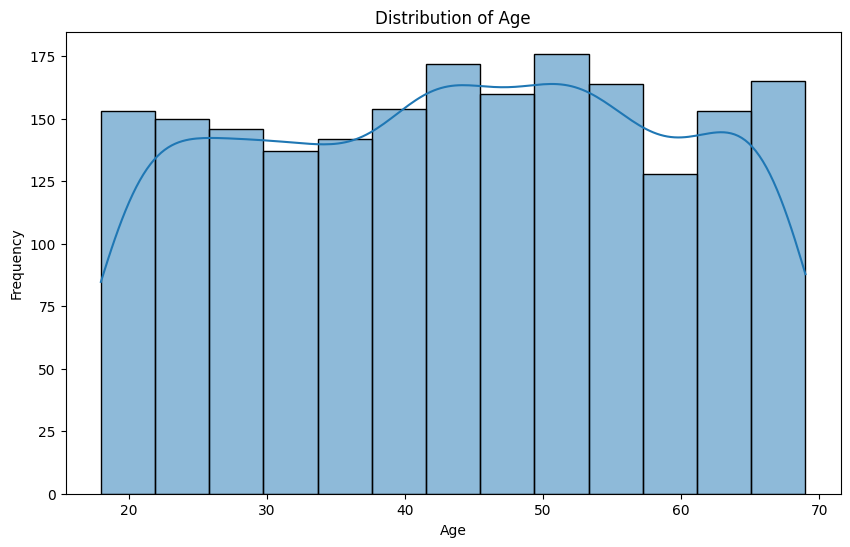

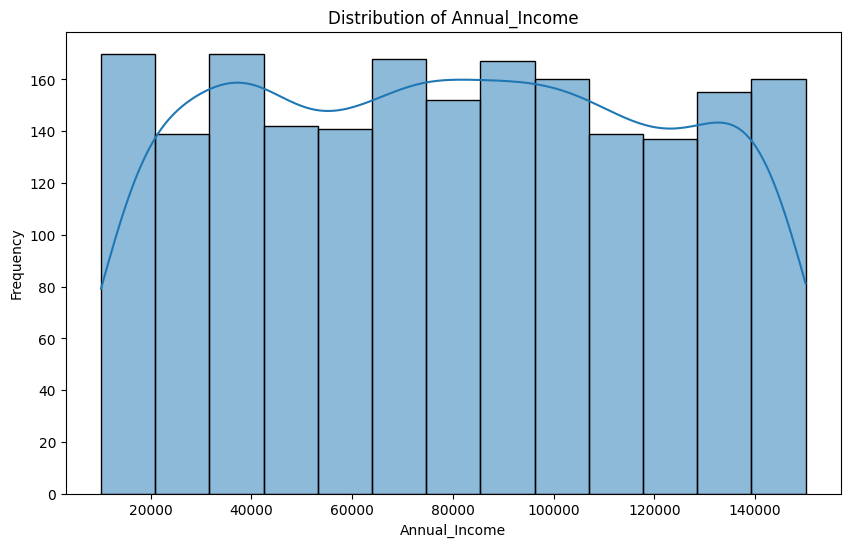

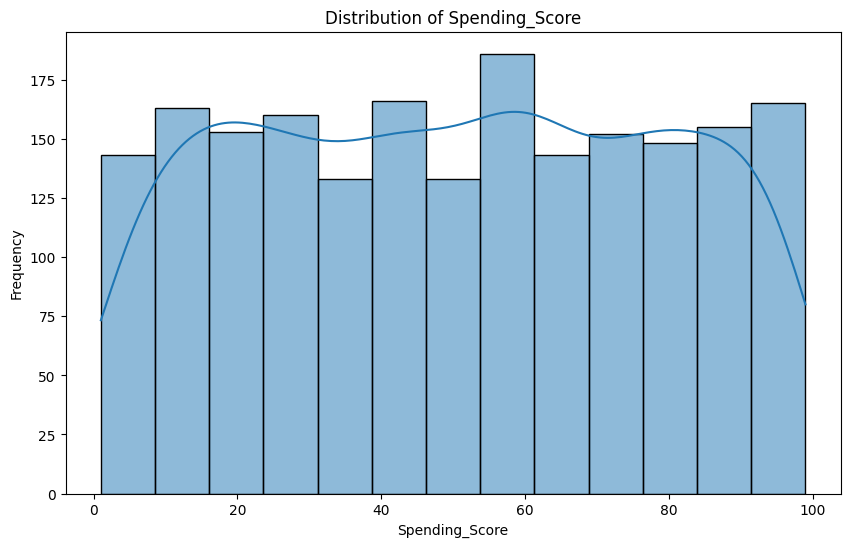

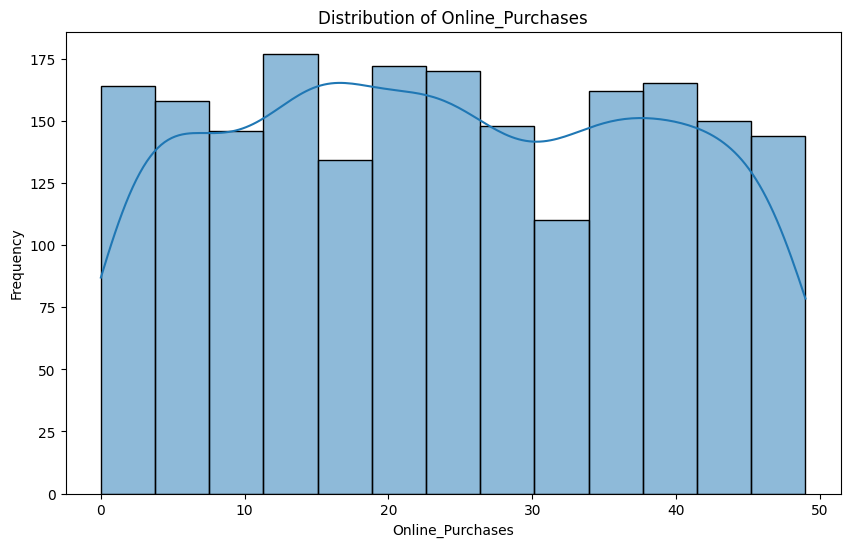

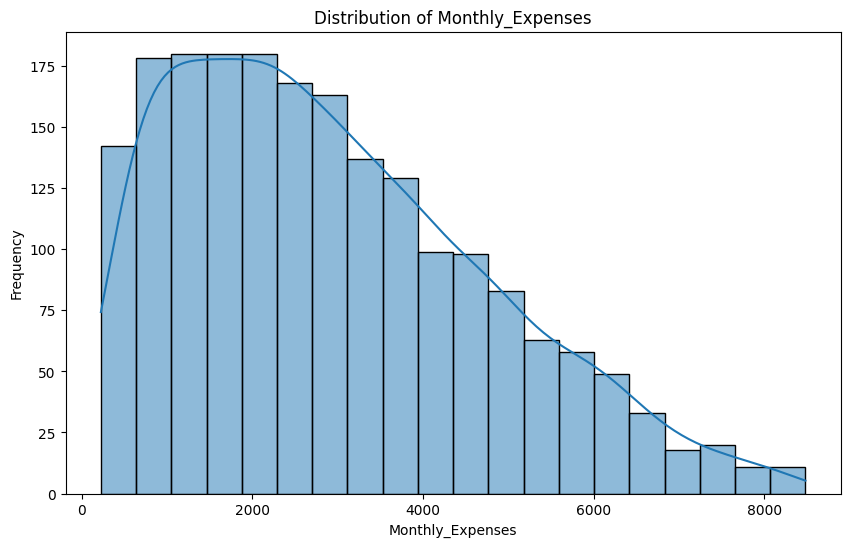

In [13]:
for col in data_numerical : 
    plt.figure(figsize = (10,6))
    sns.histplot(data_numerical[col], kde =True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
import scipy.stats as stats
#Avant de pouvoir voir la correlation entre Male/Femelle et les autres variables nuémriques, nous devons d'abord savoir si la distribution de nos valeurs peuvent être considéré comme une loi normale.
#Pour cela, nous utilisons le test de Shapiro.
test_shapiro = stats.shapiro(data_numerical)
print(test_shapiro)

if test_shapiro.pvalue < 0.05 : 
    print("La distribution des valeurs numériques ne suit pas une distribution normale")
else : 
    print("La distribution des valeurs numériques peuvent être considérés comme une distribution normale")

ShapiroResult(statistic=0.47046672324675487, pvalue=7.168554875978519e-104)
La distribution des valeurs numériques ne suit pas une distribution normale


c:\Users\KBH9801\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12000.
  res = hypotest_fun_out(*samples, **kwds)


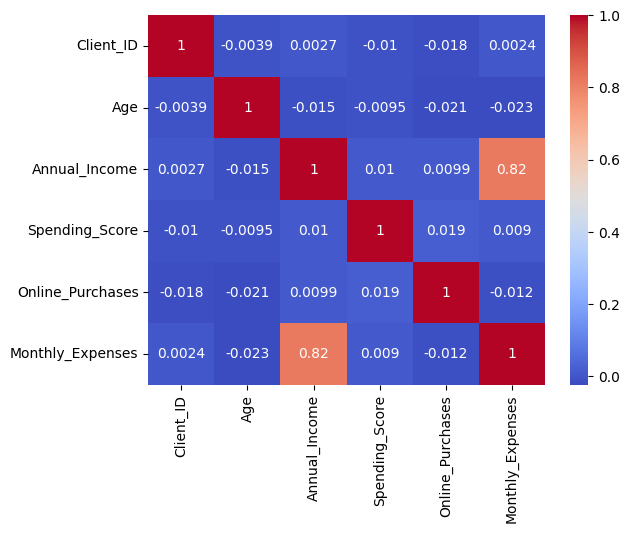

         Client_ID          Age  Annual_Income  Spending_Score  \
count  2000.000000  2000.000000    2000.000000     2000.000000   
mean   1000.500000    43.805500   79669.556000       50.331000   
std     577.494589    14.929203   40501.639502       28.276602   
min       1.000000    18.000000   10138.000000        1.000000   
25%     500.750000    31.000000   43871.500000       26.000000   
50%    1000.500000    44.000000   78923.000000       51.000000   
75%    1500.250000    56.000000  113893.000000       75.000000   
max    2000.000000    69.000000  149999.000000       99.000000   

       Online_Purchases  Monthly_Expenses  
count       2000.000000       2000.000000  
mean          24.137000       2932.368754  
std           14.281184       1812.496299  
min            0.000000        223.047642  
25%           12.000000       1465.839110  
50%           24.000000       2631.503687  
75%           37.000000       4081.962611  
max           49.000000       8481.457777  


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix_numeric = data_numerical.corr()
#la fonction heatmap donne un tableau avec différentes couleurs en fonction de leur degré de corrélation
sns.heatmap(corr_matrix_numeric, annot=True , cmap= 'coolwarm')
plt.show()
print(data_numerical.describe())

In [21]:
print(data_numerical.head())

   Age  Annual_Income  Spending_Score  Online_Purchases  Monthly_Expenses
0   56          92879              54                36       5396.905567
1   69         146727              88                25       6597.651082
2   46          54859              68                34       1083.636472
3   32          62098              92                33       3603.837071
4   60         132413              79                34       4457.320816


In [22]:
from sklearn.preprocessing import StandardScaler

columns = ["Age", "Annual_Income", "Spending_Score","Online_Purchases","Monthly_Expenses"]
# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)
# Convertir en DataFrame pour analyse ultérieure
data_scaled = pd.DataFrame(data_scaled, columns=columns)
print(data_scaled.head())

        Age  Annual_Income  Spending_Score  Online_Purchases  Monthly_Expenses
0  0.817026       0.326227        0.129786          0.830881          1.360087
1  1.688020       1.656086        1.332495          0.060444          2.022735
2  0.147031      -0.612735        0.625019          0.690802         -1.020247
3 -0.790963      -0.433957        1.473990          0.620762          0.370559
4  1.085024       1.302580        1.014131          0.690802          0.841565


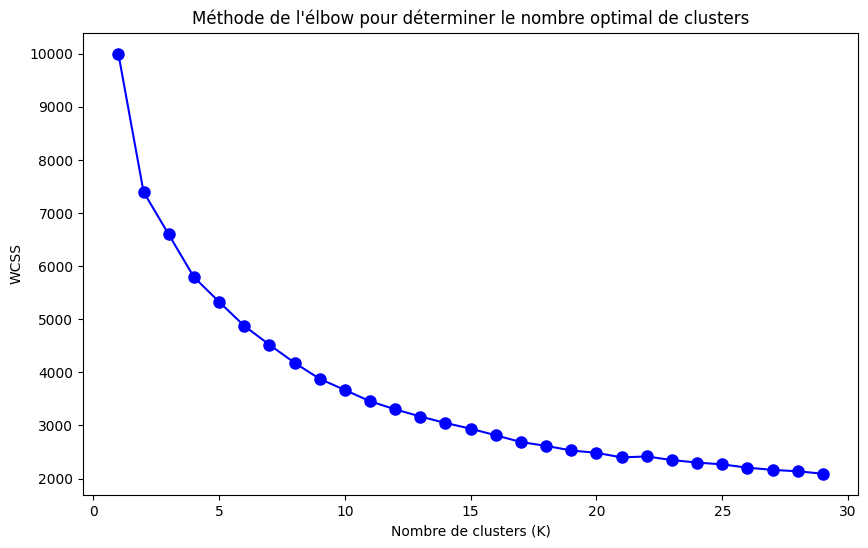

In [23]:
#Avant de pouvoir utiliser la méthode des clusters K-means, nous avons besoin de savoir à l'avance le nombre de clusters que l'on va appliquer
#Pour cela, nous utilisons la méthode ELbow
#On prend le K qui permet d'avoir le coude (la courbe en bas à gauche)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supposons que df_scaled est le DataFrame normalisé

# Liste pour stocker les WCSS pour chaque valeur de K
wcss = []

# Calcul de WCSS pour différentes valeurs de K
K_values = range(1, 30)
for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Tracer le graphe de l'élbow
plt.figure(figsize=(10, 6))
plt.plot(K_values, wcss, 'bo-', markersize=8)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('WCSS')
plt.title('Méthode de l\'élbow pour déterminer le nombre optimal de clusters')
plt.show()

In [24]:
def optimise_k_means(data,max_k) : 
    means=[]
    inertias=[]

    for k in range(1, max_k) : 
        kmeans= KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

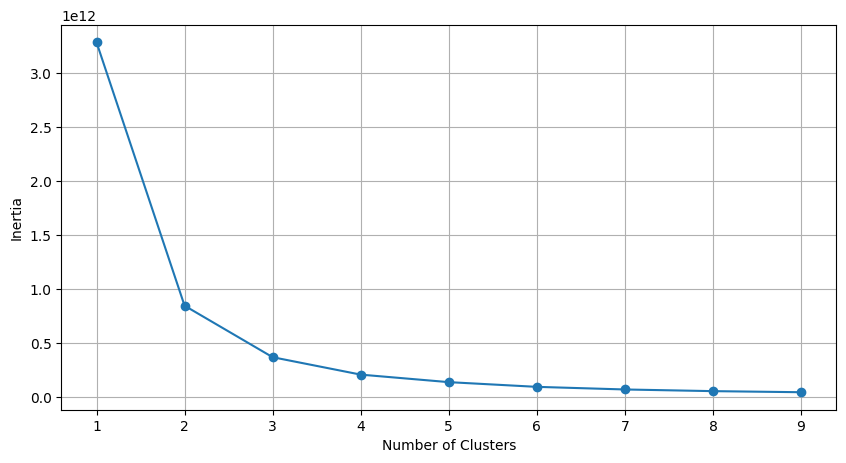

In [26]:
optimise_k_means(data_numerical,10)

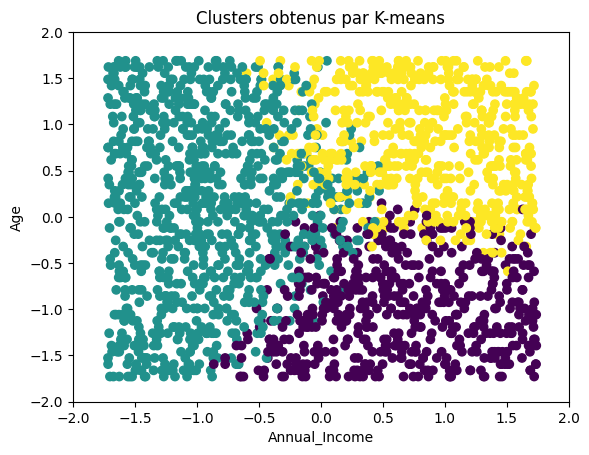

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Au vu du schéma, cela partirait pour K = 2, mais on essaye K = 4
K = 3
n_clusters = K

# Initialisation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Appliquer K-means sur les données normalisées
labels = kmeans.fit_predict(data_scaled)
# Ajouter les labels de clusters aux colonnes numériques si nécessaire
data_numerical['Cluster'] = labels


# Visualisation des clusters (si les données sont en 2D)
if isinstance(data_scaled, pd.DataFrame):
    plt.scatter(data_scaled.iloc[:, 1], data_scaled.iloc[:, 0], c=labels)
else:
    plt.scatter(data_scaled[:, 1], data_scaled[:, 0], c=labels)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Clusters obtenus par K-means')
plt.xlabel('Annual_Income')
plt.ylabel('Age')
plt.show()

In [60]:
cluster_profile =data_numerical.groupby('Cluster').mean()
print(cluster_profile)

               Age  Annual_Income  Spending_Score  Online_Purchases  \
Cluster                                                               
0        28.893058  105486.684803       49.562852         25.515947   
1        45.275634   43267.082690       49.148842         23.714443   
2        55.617857  114056.187500       52.976786         23.508929   

         Monthly_Expenses  
Cluster                    
0             3935.678243  
1             1439.960575  
2             4394.601363  


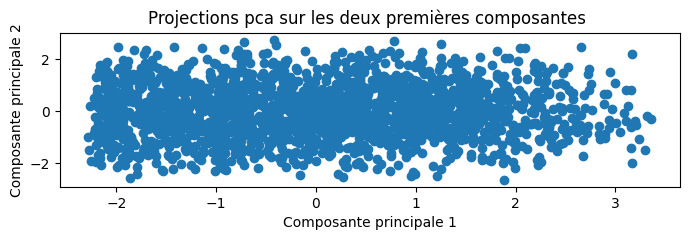

In [48]:
from sklearn.decomposition import PCA
n_components= 2
pca = PCA(n_components)
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PCA1' ,'PCA2'])
plt.figure(figsize=(8,2))
plt.scatter(data_pca['PCA1'], data_pca['PCA2'])
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projections pca sur les deux premières composantes ')
plt.show()

In [61]:
cluster_summary = data_numerical.groupby('Cluster').mean()
print(cluster_summary)

               Age  Annual_Income  Spending_Score  Online_Purchases  \
Cluster                                                               
0        28.893058  105486.684803       49.562852         25.515947   
1        45.275634   43267.082690       49.148842         23.714443   
2        55.617857  114056.187500       52.976786         23.508929   

         Monthly_Expenses  
Cluster                    
0             3935.678243  
1             1439.960575  
2             4394.601363  


In [56]:
print("On peut distinguer 3 catégories : ")
print("Le groupe 1 est les personnes jeunes à haut revenus")
print("Le groupe 2 est les personnes agés à faibles revenus")
print("Le groupe 3 est les personnes agés à haut revenus")

On peut distinguer 3 catégories : 
Le groupe 1 est les personnes jeunes à haut revenus
Le groupe 2 est les personnes agés à faibles revenus
Le groupe 3 est les personnes agés à haut revenus


In [50]:
data["Cluster"] = data_numerical["Cluster"]
print(data.head())

   Client_ID  Age  Annual_Income  Spending_Score  Online_Purchases  \
0          1   56          92879              54                36   
1          2   69         146727              88                25   
2          3   46          54859              68                34   
3          4   32          62098              92                33   
4          5   60         132413              79                34   

   Loyalty_Card Income_Category  Monthly_Expenses  Cluster  
0         False            High       5396.905567        2  
1         False       Very High       6597.651082        2  
2         False          Medium       1083.636472        1  
3         False          Medium       3603.837071        0  
4          True       Very High       4457.320816        2  


In [52]:
cluster_distribution = data.groupby('Cluster')['Loyalty_Card'].value_counts(normalize=True)
print(cluster_distribution)


Cluster  Loyalty_Card
0        False           0.512195
         True            0.487805
1        False           0.525910
         True            0.474090
2        True            0.532143
         False           0.467857
Name: proportion, dtype: float64


In [53]:
cluster_distribution = data.groupby('Cluster')['Income_Category'].value_counts(normalize=True)
print(cluster_distribution)

Cluster  Income_Category
0        High               0.579737
         Very High          0.328330
         Medium             0.091932
         Low                0.000000
1        Medium             0.551268
         Low                0.316428
         High               0.132304
         Very High          0.000000
2        High               0.526786
         Very High          0.444643
         Medium             0.028571
         Low                0.000000
Name: proportion, dtype: float64


In [55]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Le coefficient de silhouette moyen est de : {silhouette_avg:.3f}")

Le coefficient de silhouette moyen est de : 0.189


In [ ]:
print("Conclusion : ")
